<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="fusarium_oxysporum"
dataset = 3
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores fusarium_oxysporum dataset 3, con valores atípicos.
Valores del documento csv.

         X0      X1     X2     X3     X4      X5     X6      X7     X8     X9  \
0    10.204   5.102  2.721  5.782  1.361   6.463  2.381  10.544  3.061  4.082   
1     8.304   4.152  4.498  6.228  0.865   8.304  3.633   5.363  2.941  3.806   
2     9.179   7.729  1.932  8.213  0.483   7.246  3.865   5.314  2.899  2.899   
3    10.526   3.204  5.034  4.119  1.373   3.204  4.348   7.323  2.975  4.805   
4     5.545   8.688  5.176  5.915  1.664   7.948  4.806   5.176  2.588  4.991   
..      ...     ...    ...    ...    ...     ...    ...     ...    ...    ...   
995  10.127   3.797  1.266  7.595  1.582   6.962  4.114   7.595  3.165  6.962   
996   6.535   5.847  3.955  5.503  0.860   7.395  5.589   5.159  2.150  6.019   
997   8.937  10.894  3.327  7.502  0.587  11.220  4.044   5.023  3.653  2.609   
998   6.977   6.566  3.967  5.198  1.778   6.566  4.651  

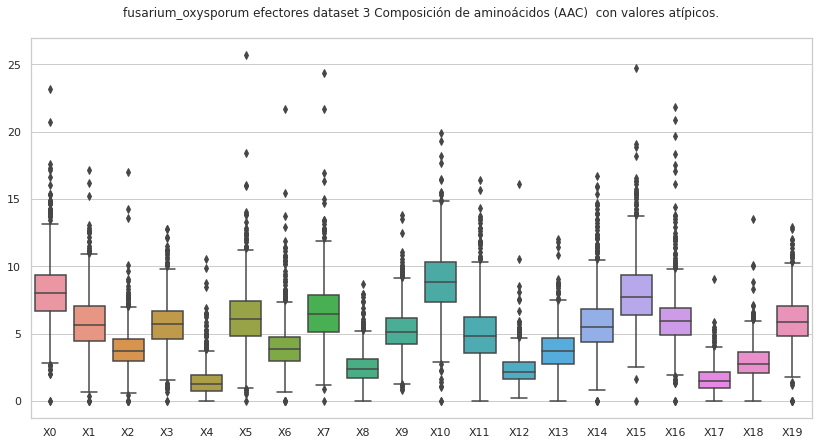

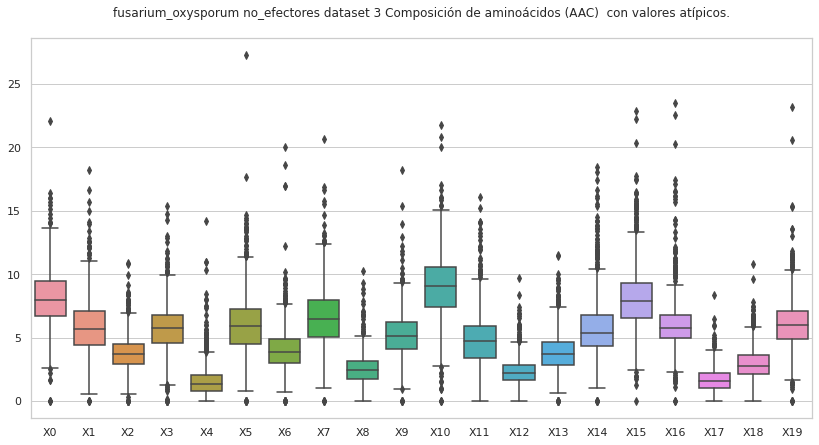

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores fusarium_oxysporum dataset 3, sin valores atípicos.
Valores del documento csv.

         X0      X1     X2     X3     X4      X5     X6      X7     X8     X9  \
0    10.204   5.102  2.721  5.782  1.361   6.463  2.381  10.544  3.061  4.082   
1     8.304   4.152  4.498  6.228  0.865   8.304  3.633   5.363  2.941  3.806   
2     9.179   7.729  1.932  8.213  0.483   7.246  3.865   5.314  2.899  2.899   
3    10.526   3.204  5.034  4.119  1.373   3.204  4.348   7.323  2.975  4.805   
4     5.545   8.688  5.176  5.915  1.664   7.948  4.806   5.176  2.588  4.991   
..      ...     ...    ...    ...    ...     ...    ...     ...    ...    ...   
995  10.127   3.797  1.266  7.595  1.582   6.962  4.114   7.595  3.165  6.962   
996   6.535   5.847  3.955  5.503  0.860   7.395  5.589   5.159  2.150  6.019   
997   8.937  10.894  3.327  7.502  0.587  11.220  4.044   5.023  3.653  2.609   
998   6.977   6.566  3.967  5.198  1.778   6.566  4.651  

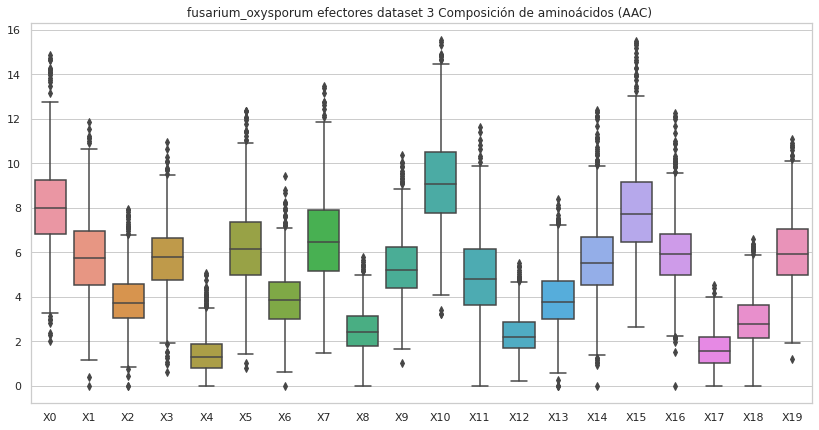

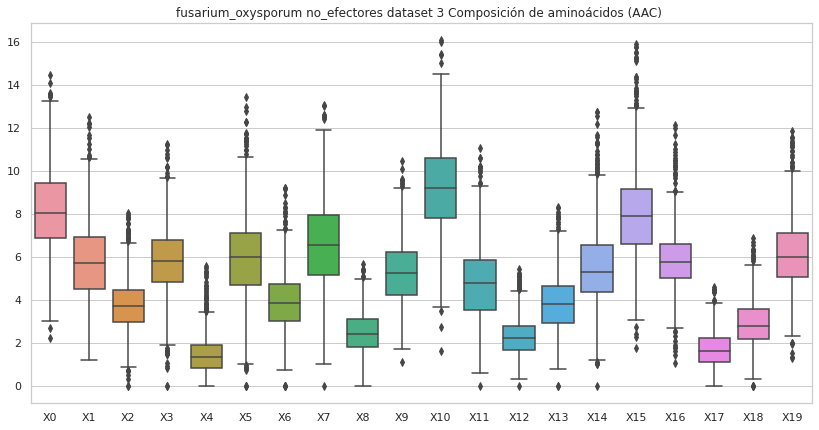

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores fusarium_oxysporum dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.042668  0.005689  0.024179  0.027023  0.015645  0.044090  0.012800   
1    0.034472  0.003591  0.025854  0.034472  0.018672  0.022263  0.012209   
2    0.040510  0.002132  0.036246  0.031982  0.010661  0.023453  0.012793   
3    0.076976  0.010040  0.030121  0.023428  0.038488  0.053549  0.021754   
4    0.021000  0.006300  0.022400  0.030100  0.011900  0.019600  0.009800   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.044521  0.006956  0.033390  0.030608  0.008348  0.033390  0.013913   
996  0.048412  0.006370  0.040768  0.054782  0.028665  0.038220  0.015925   
997  0.010560  0.000694  0.008864  0.013258  0.001233  0.005935  0.004316   
998  0.036227  0.009234  0.026992  0.034096  0.022730  0.026992  0.012786  

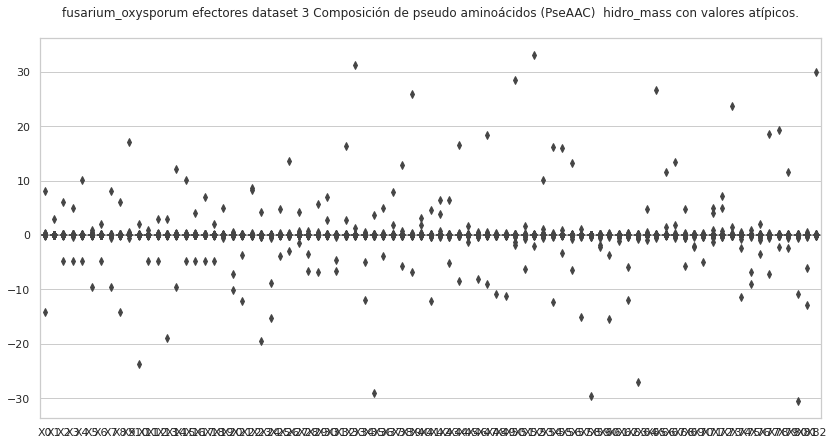

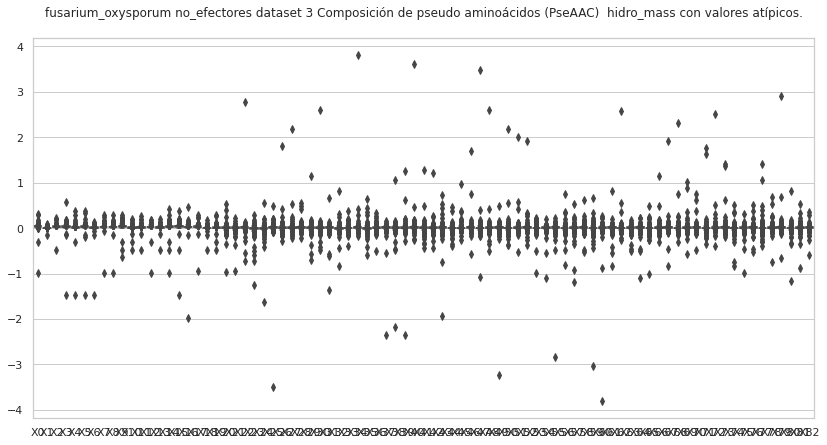

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores fusarium_oxysporum dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.042668  0.005689  0.024179  0.027023  0.015645  0.044090  0.012800   
1    0.034472  0.003591  0.025854  0.034472  0.018672  0.022263  0.012209   
2    0.040510  0.002132  0.036246  0.031982  0.010661  0.023453  0.012793   
3    0.076976  0.010040  0.030121  0.023428  0.038488  0.053549  0.021754   
4    0.021000  0.006300  0.022400  0.030100  0.011900  0.019600  0.009800   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.044521  0.006956  0.033390  0.030608  0.008348  0.033390  0.013913   
996  0.048412  0.006370  0.040768  0.054782  0.028665  0.038220  0.015925   
997  0.010560  0.000694  0.008864  0.013258  0.001233  0.005935  0.004316   
998  0.036227  0.009234  0.026992  0.034096  0.022730  0.026992  0.012786  

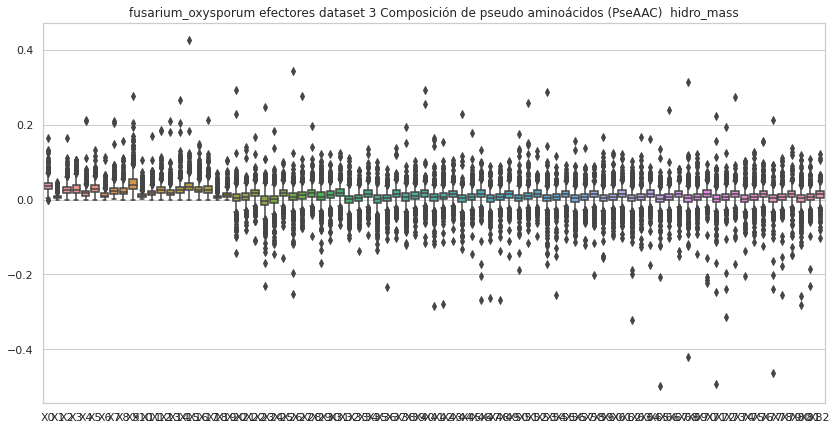

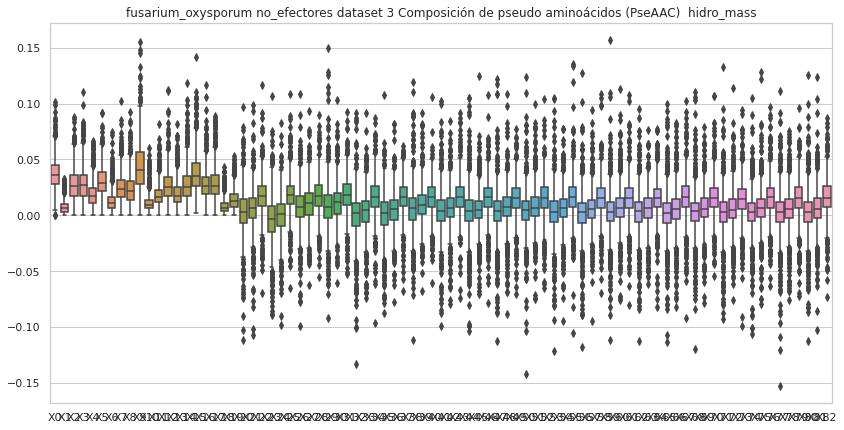

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores fusarium_oxysporum dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.043079  0.005744  0.024412  0.027284  0.015796  0.044515  0.012924   
1    0.058191  0.006062  0.043643  0.058191  0.031520  0.037582  0.020609   
2    0.050991  0.002684  0.045624  0.040256  0.013419  0.029521  0.016102   
3    0.065546  0.008549  0.025648  0.019949  0.032773  0.045597  0.018524   
4    0.045360  0.013608  0.048384  0.065016  0.025704  0.042336  0.021168   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.046003  0.007188  0.034502  0.031627  0.008626  0.034502  0.014376   
996  0.053294  0.007012  0.044879  0.060307  0.031556  0.042074  0.017531   
997  0.049883  0.003277  0.041872  0.062626  0.005826  0.028036  0.020390   
998  0.045830  0.011682  0.034148  0.043134  0.028756  0.034148  0.016175   
999 

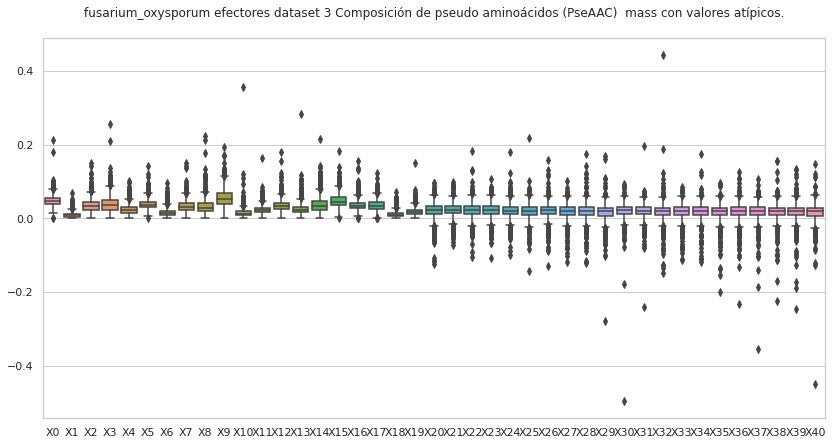

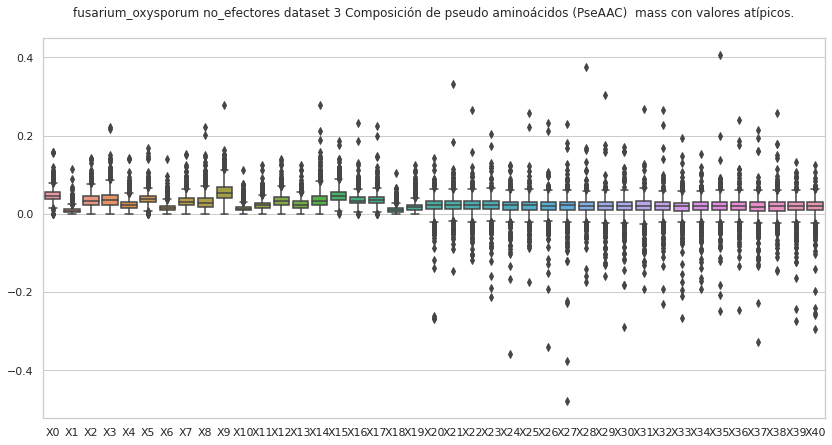

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores fusarium_oxysporum dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.043079  0.005744  0.024412  0.027284  0.015796  0.044515  0.012924   
1    0.058191  0.006062  0.043643  0.058191  0.031520  0.037582  0.020609   
2    0.050991  0.002684  0.045624  0.040256  0.013419  0.029521  0.016102   
3    0.065546  0.008549  0.025648  0.019949  0.032773  0.045597  0.018524   
4    0.045360  0.013608  0.048384  0.065016  0.025704  0.042336  0.021168   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.046003  0.007188  0.034502  0.031627  0.008626  0.034502  0.014376   
996  0.053294  0.007012  0.044879  0.060307  0.031556  0.042074  0.017531   
997  0.049883  0.003277  0.041872  0.062626  0.005826  0.028036  0.020390   
998  0.045830  0.011682  0.034148  0.043134  0.028756  0.034148  0.016175   
999  0.048838 

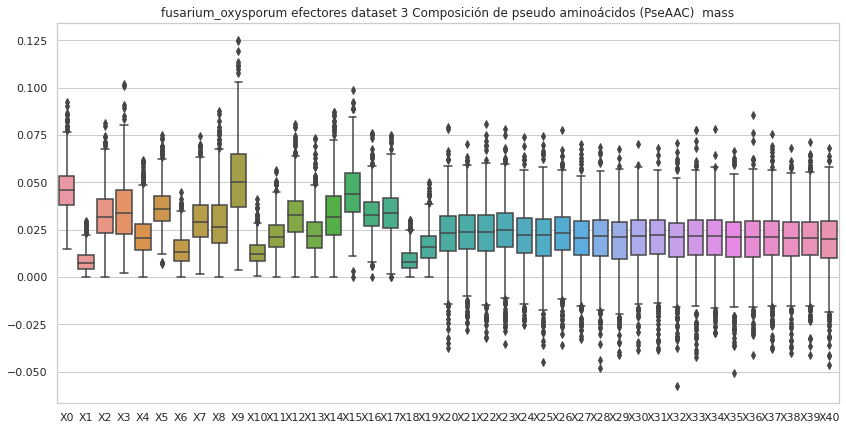

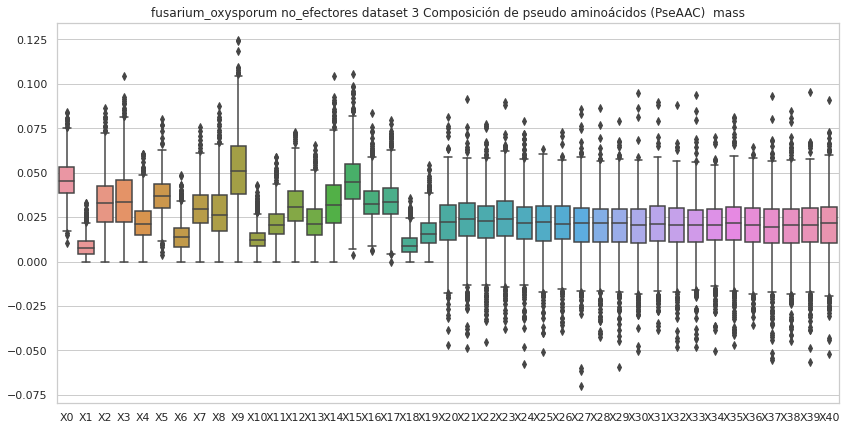

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores fusarium_oxysporum dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.099764  0.013302  0.056533  0.063184  0.036580  0.103089  0.029929   
1    0.041901  0.004365  0.031426  0.041901  0.022696  0.027061  0.014840   
2    0.062622  0.003296  0.056031  0.049439  0.016480  0.036255  0.019775   
3    0.138226  0.018030  0.054089  0.042069  0.069113  0.096157  0.039064   
4    0.022932  0.006880  0.024461  0.032869  0.012995  0.021403  0.010702   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.094350  0.014742  0.070762  0.064865  0.017691  0.070762  0.029484   
996  0.058157  0.007652  0.048975  0.065810  0.034435  0.045914  0.019131   
997  0.011650  0.000765  0.009779  0.014626  0.001361  0.006548  0.004762   
998  0.049708  0.012671  0.037037  0.046784  0.031189  0.037037  0.017544   
999

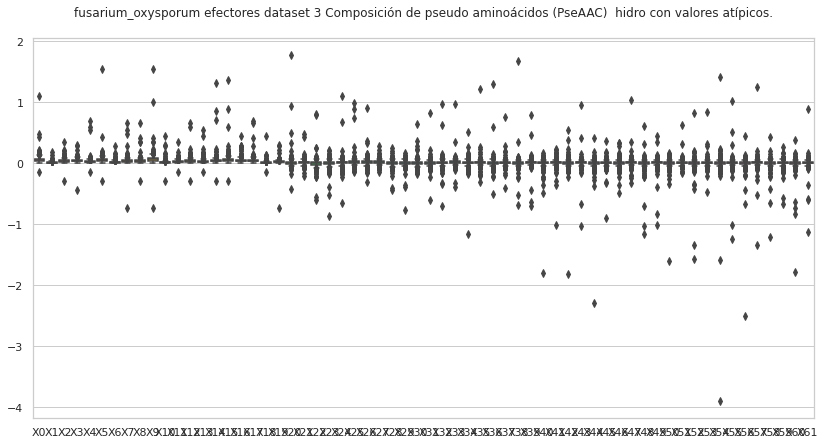

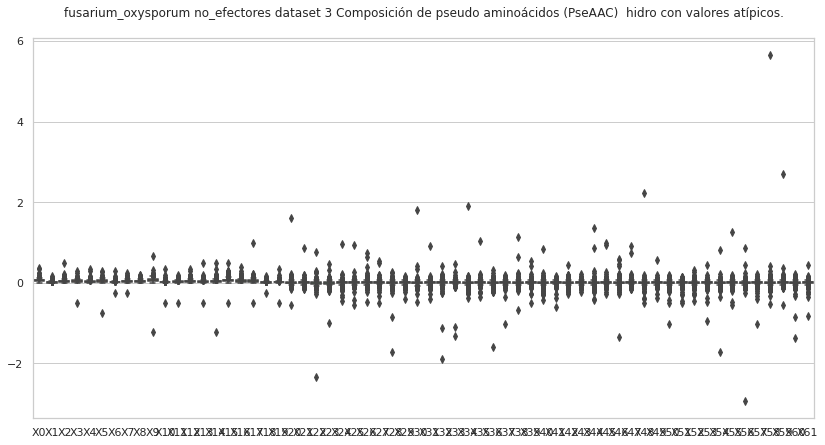

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores fusarium_oxysporum dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.099764  0.013302  0.056533  0.063184  0.036580  0.103089  0.029929   
1    0.041901  0.004365  0.031426  0.041901  0.022696  0.027061  0.014840   
2    0.062622  0.003296  0.056031  0.049439  0.016480  0.036255  0.019775   
3    0.138226  0.018030  0.054089  0.042069  0.069113  0.096157  0.039064   
4    0.022932  0.006880  0.024461  0.032869  0.012995  0.021403  0.010702   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.094350  0.014742  0.070762  0.064865  0.017691  0.070762  0.029484   
996  0.058157  0.007652  0.048975  0.065810  0.034435  0.045914  0.019131   
997  0.011650  0.000765  0.009779  0.014626  0.001361  0.006548  0.004762   
998  0.049708  0.012671  0.037037  0.046784  0.031189  0.037037  0.017544   
999  0.02

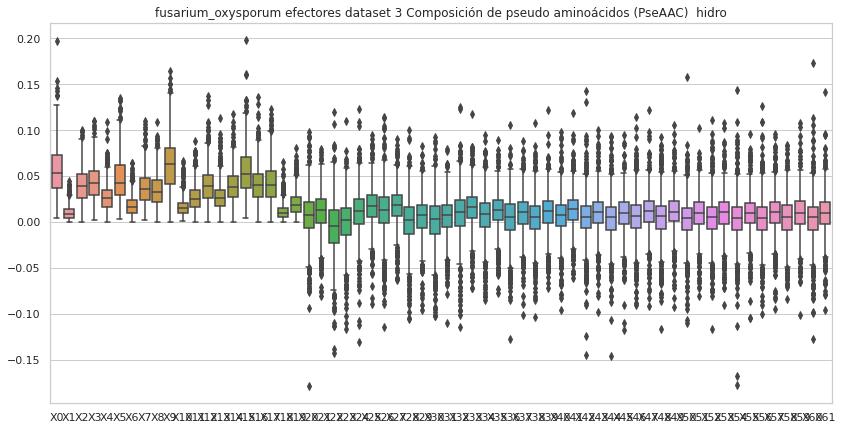

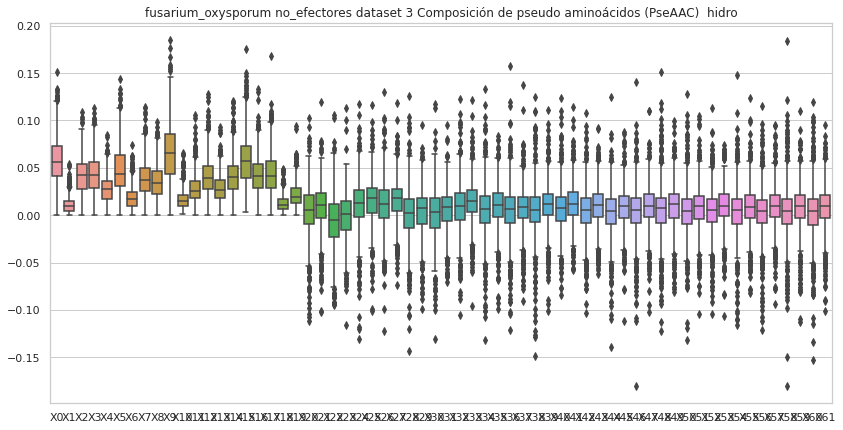

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores fusarium_oxysporum dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.013952 -0.055806 -0.016258  0.085893 -0.058251 -0.090093  0.057338   
1    0.079270  0.056174  0.036470  0.066935 -0.052461 -0.073548 -0.091442   
2   -0.005653  0.073230 -0.024098  0.124723 -0.015845  0.041716  0.048514   
3    0.063594 -0.023570 -0.003357  0.041148 -0.058540  0.052066 -0.002636   
4   -0.026582  0.001799  0.007927  0.023703  0.005890 -0.078885  0.019054   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.029162 -0.047127  0.042632  0.042425  0.014037 -0.034396  0.039998   
996 -0.009585 -0.026947 -0.006991  0.025855  0.008368 -0.056399  0.021435   
997  0.071460  0.074796  0.039679  0.051660  0.050697  0.031004  0.001941   
998  0.026544 -0.015703  0.018220 -0.025364  0.060470 -0.026365  0.045653   
999 

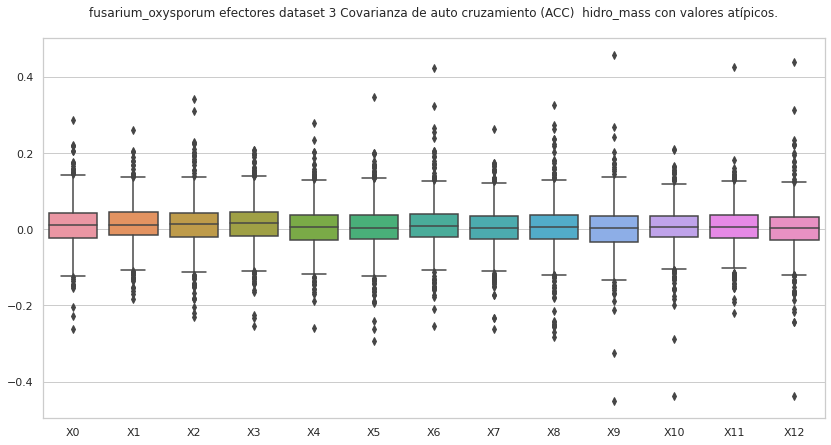

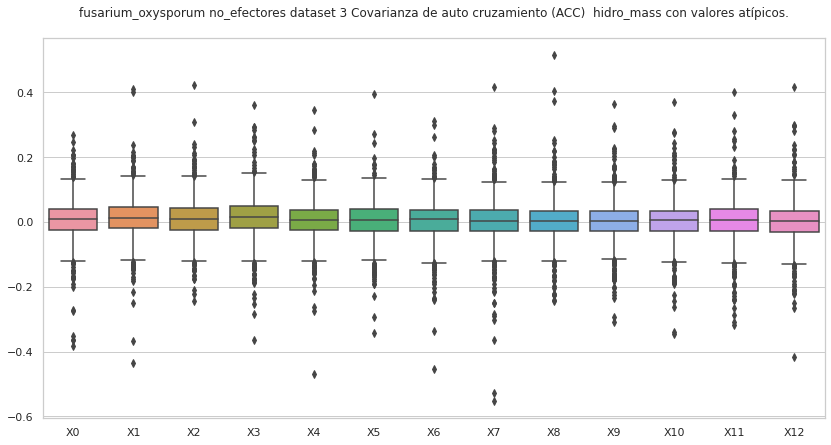

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores fusarium_oxysporum dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.013952 -0.055806 -0.016258  0.085893 -0.058251 -0.090093  0.057338   
1    0.079270  0.056174  0.036470  0.066935 -0.052461 -0.073548 -0.091442   
2   -0.005653  0.073230 -0.024098  0.124723 -0.015845  0.041716  0.048514   
3    0.063594 -0.023570 -0.003357  0.041148 -0.058540  0.052066 -0.002636   
4   -0.026582  0.001799  0.007927  0.023703  0.005890 -0.078885  0.019054   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.045926  0.032206 -0.015503  0.026210 -0.012588 -0.045361 -0.034476   
996 -0.009585 -0.026947 -0.006991  0.025855  0.008368 -0.056399  0.021435   
997  0.071460  0.074796  0.039679  0.051660  0.050697  0.031004  0.001941   
998  0.026544 -0.015703  0.018220 -0.025364  0.060470 -0.026365  0.045653   
999 

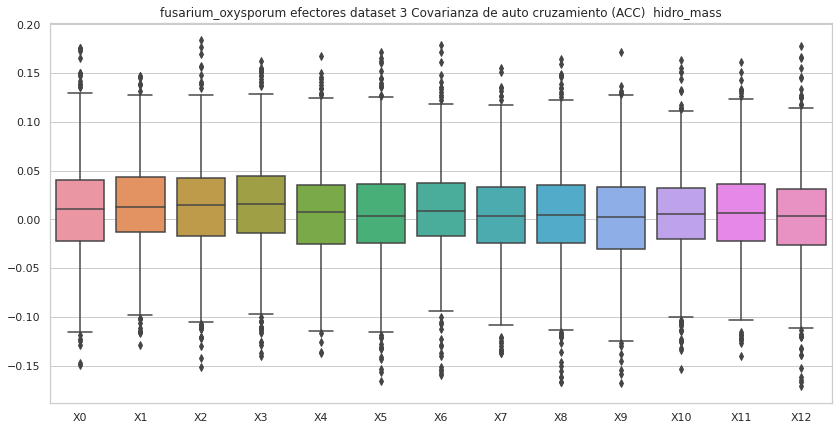

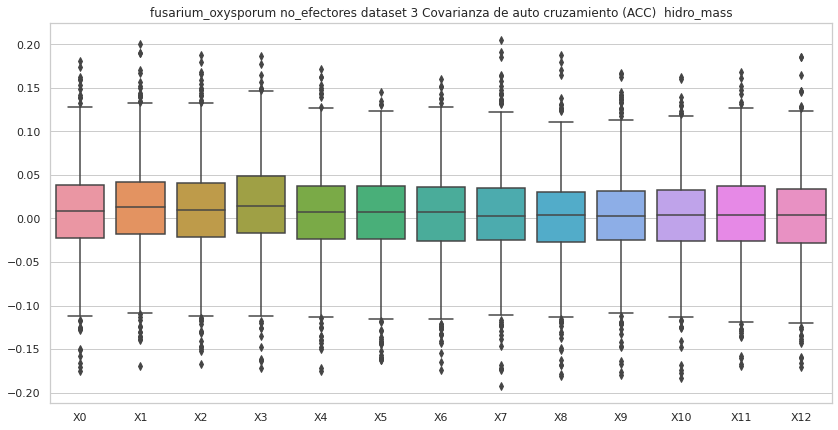

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores fusarium_oxysporum dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.013952 -0.055806 -0.016258  0.085893 -0.058251 -0.090093  0.057338   
1    0.079270  0.056174  0.036470  0.066935 -0.052461 -0.073548 -0.091442   
2   -0.005653  0.073230 -0.024098  0.124723 -0.015845  0.041716  0.048514   
3    0.063594 -0.023570 -0.003357  0.041148 -0.058540  0.052066 -0.002636   
4   -0.026582  0.001799  0.007927  0.023703  0.005890 -0.078885  0.019054   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.029162 -0.047127  0.042632  0.042425  0.014037 -0.034396  0.039998   
996 -0.009585 -0.026947 -0.006991  0.025855  0.008368 -0.056399  0.021435   
997  0.071460  0.074796  0.039679  0.051660  0.050697  0.031004  0.001941   
998  0.026544 -0.015703  0.018220 -0.025364  0.060470 -0.026365  0.045653   
999 -0.053

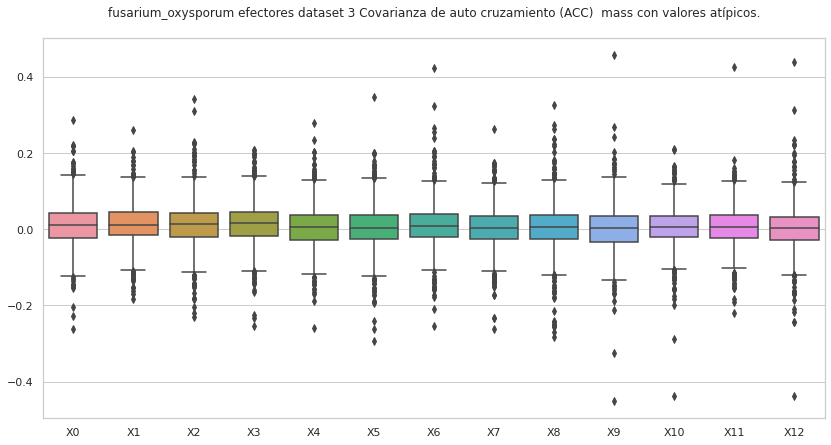

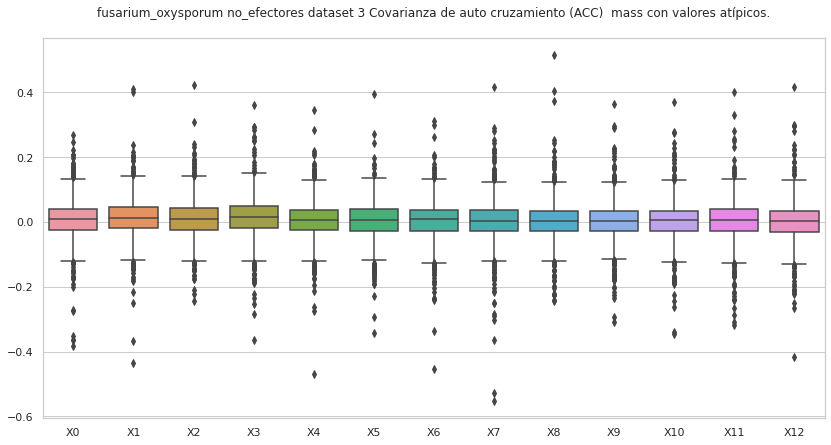

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores fusarium_oxysporum dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.013952 -0.055806 -0.016258  0.085893 -0.058251 -0.090093  0.057338   
1    0.079270  0.056174  0.036470  0.066935 -0.052461 -0.073548 -0.091442   
2   -0.005653  0.073230 -0.024098  0.124723 -0.015845  0.041716  0.048514   
3    0.063594 -0.023570 -0.003357  0.041148 -0.058540  0.052066 -0.002636   
4   -0.026582  0.001799  0.007927  0.023703  0.005890 -0.078885  0.019054   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.045926  0.032206 -0.015503  0.026210 -0.012588 -0.045361 -0.034476   
996 -0.009585 -0.026947 -0.006991  0.025855  0.008368 -0.056399  0.021435   
997  0.071460  0.074796  0.039679  0.051660  0.050697  0.031004  0.001941   
998  0.026544 -0.015703  0.018220 -0.025364  0.060470 -0.026365  0.045653   
999 -0.053670  0.016

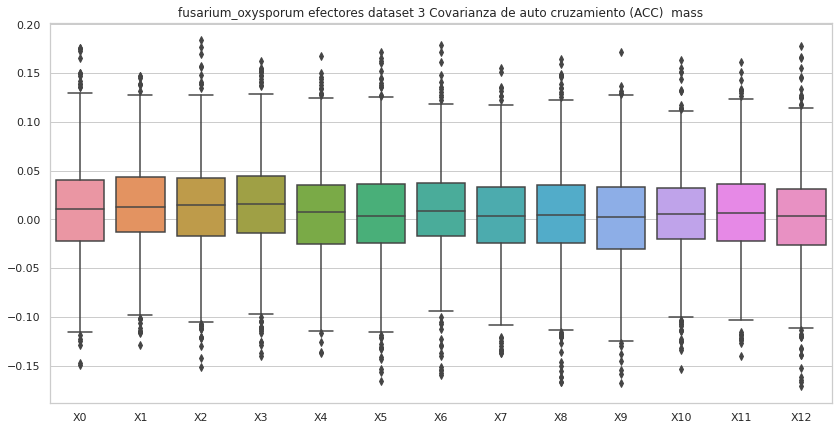

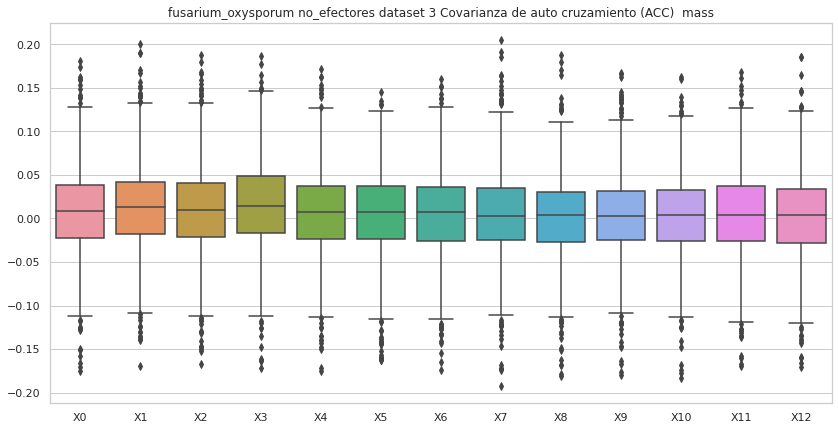

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores fusarium_oxysporum dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.068279 -0.064832 -0.129218 -0.031865 -0.037906  0.045728 -0.019197   
1    0.082729 -0.010446  0.088468  0.090486  0.058365  0.033042 -0.062850   
2    0.018646 -0.150613  0.077810  0.060207  0.005621  0.044534 -0.020327   
3    0.011703 -0.091254  0.049492 -0.068715 -0.033710 -0.027945 -0.009435   
4   -0.005527 -0.062334  0.030022  0.045908  0.018507 -0.041892  0.125287   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.112615  0.031008  0.058008  0.066753  0.050346 -0.103660  0.050554   
996  0.001451 -0.045537 -0.000740 -0.009778 -0.059500  0.011729 -0.000996   
997  0.089102  0.104744  0.116950  0.114540  0.128826  0.091404  0.097111   
998  0.026800  0.014432  0.063959  0.038476 -0.005332  0.020018  0.038805   
999  0.08

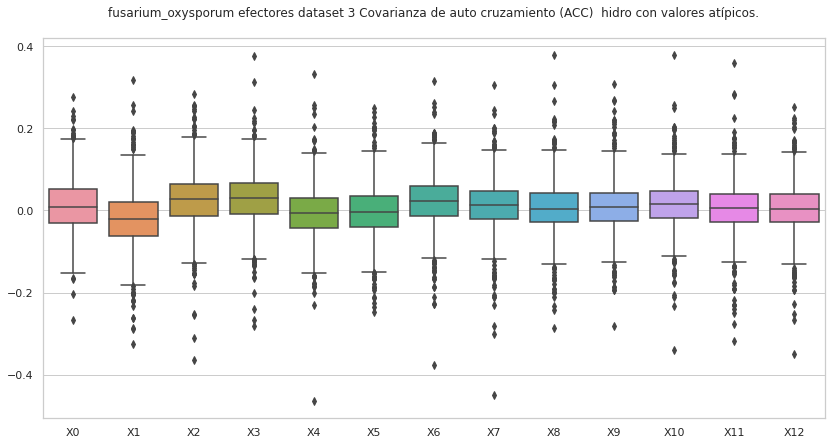

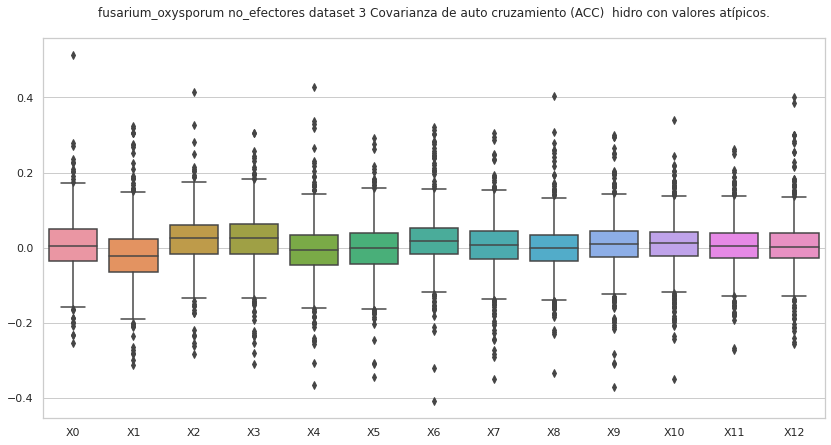

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores fusarium_oxysporum dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.068279 -0.064832 -0.129218 -0.031865 -0.037906  0.045728 -0.019197   
1    0.082729 -0.010446  0.088468  0.090486  0.058365  0.033042 -0.062850   
2    0.018646 -0.150613  0.077810  0.060207  0.005621  0.044534 -0.020327   
3    0.011703 -0.091254  0.049492 -0.068715 -0.033710 -0.027945 -0.009435   
4   -0.005527 -0.062334  0.030022  0.045908  0.018507 -0.041892  0.125287   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.112615  0.031008  0.058008  0.066753  0.050346 -0.103660  0.050554   
996  0.001451 -0.045537 -0.000740 -0.009778 -0.059500  0.011729 -0.000996   
997  0.089102  0.104744  0.116950  0.114540  0.128826  0.091404  0.097111   
998  0.026800  0.014432  0.063959  0.038476 -0.005332  0.020018  0.038805   
999  0.089752  

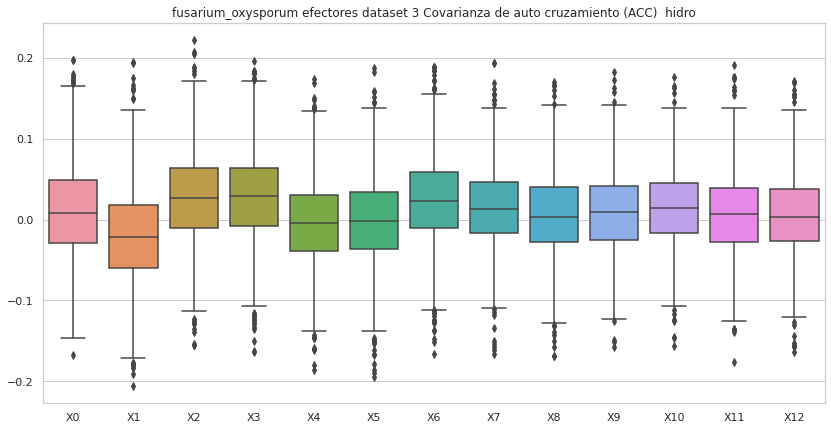

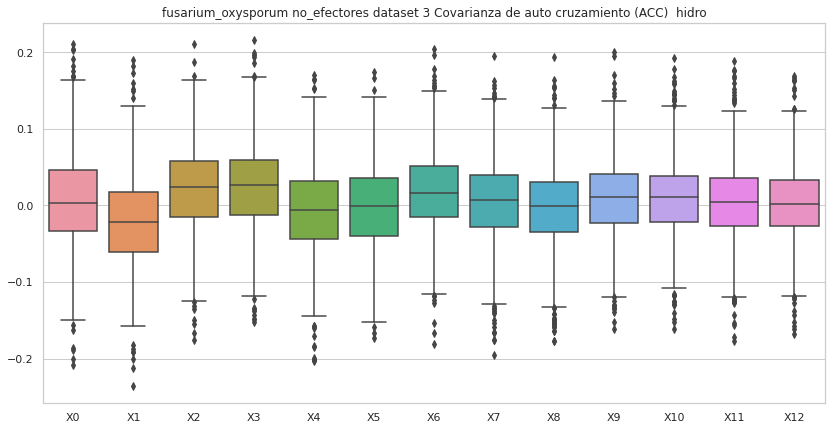

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))